결측값때문에 행의 개수가 달라짐 -> 결측값 처리가 우선시 되어야 함 -> interpolate 를 통해 선형 보간 해줌

In [1]:
# from . import _distributor_init
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
dangjin_fcst = pd.read_csv('data/dangjin_fcst_data.csv') # 당진시 기상예보 데이터
dangjin_obs = pd.read_csv('data/dangjin_obs_data.csv') # 당진시 기상관측 데이터
energy = pd.read_csv('data/energy.csv') # 에너지 발생량 데이터 (여기에서는 dangjin 컬럼의 데이터를 사용)

In [3]:
dangjin_obs_df = dangjin_obs.copy()
dnagjin_fcst_df = dangjin_fcst.copy()

In [4]:
# dangjin_obs[dangjin_obs['일시'].dt.hour==14]
dangjin_obs_df['일시'] = pd.to_datetime(dangjin_obs['일시'])

In [5]:
# 삽입할 데이터를 만들어줌
new_data = dangjin_obs_df[:6].copy()
new_data['일시'] = ['2018-07-24 11:00:00', '2018-07-24 12:00:00', '2018-07-24 13:00:00', '2018-07-24 14:00:00', '2018-07-24 15:00:00', '2018-07-24 16:00:00']
new_data['기온(°C)'] = pd.Series()
new_data['풍속(m/s)'] = pd.Series()
new_data['풍향(16방위)'] = pd.Series()
new_data['습도(%)'] = pd.Series()
new_data['전운량(10분위)'] = pd.Series()

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to s

In [6]:
idx = 3491 # 중간에 삽입할 index값
temp1 = dangjin_obs_df[dangjin_obs_df.index < idx].copy()
temp2 = dangjin_obs_df[dangjin_obs_df.index >= idx].copy()
dangjin_obs_df = temp1.append(new_data, ignore_index=True).append(temp2, ignore_index=True)

In [7]:
ts = dangjin_obs_df['풍속(m/s)'].copy()
ts_intp_linear = ts.interpolate()  # ts.interpolote() 는 default 가 interpolate(method='values')로 선형으로 비례하여 결측값을 보간해줌

In [8]:
# 결측값 보간 방법 참고 : https://rfriend.tistory.com/264 , https://eda-ai-lab.tistory.com/14
dangjin_obs_df['풍속(m/s)'] = dangjin_obs_df['풍속(m/s)'].interpolate() # 풍속(m/s) 열의 결측값을 보간해줌
dangjin_obs_df['기온(°C)'] = dangjin_obs_df['기온(°C)'].interpolate() # 기온(°C) 열의 결측값을 보간해줌
dangjin_obs_df['풍향(16방위)'] = dangjin_obs_df['풍향(16방위)'].interpolate() # 풍향(16방위) 열의 결측값을 보간해줌
dangjin_obs_df['습도(%)'] = dangjin_obs_df['습도(%)'].interpolate() # 습도(%) 열의 결측값을 보간해줌

In [9]:
dangjin_itp = pd.read_csv('data/석문면_하늘상태_201803_201807.csv')

In [10]:
# dangjin_obs_df['전운량(10분위)'] = dangjin_obs_df['전운량(10분위)'].interpolate().copy() # 전운량(10분위) 열의 결측값을 보간해줌
# dangjin_nan = dangjin_obs_df[dangjin_obs_df['전운량(10분위)'].isnull()].copy() # 전운량 은 왜 결측값 보간이 안되는 행이 있지? - 보간에 활용할 이전 데이터가 없어서 보간이 안된듯...
# # 그럼 보간에 활용할 데이터는 어떻게 입력해주지?? -> 석문면_하늘상태_201803_201807.csv 파일의 value 데이터 값을 활용해보자
dangjin_obs_df['전운량(10분위)'][:3324] = dangjin_itp['value location:53_114 Start : 20180301 '][:3324]
dangjin_obs_df['전운량(10분위)'] = dangjin_obs_df['전운량(10분위)'].interpolate() # 석문면_하늘상태_201803_201807.csv 파일에도 결측값이 4개 존재하므로 interpolate 를 통해 결측값을 보간해줌

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
# 예보 시간 컬럼의 데이터 타입을 datetime으로 변경함
dangjin_fcst['Forecast_time'] = pd.to_datetime(dangjin_fcst['Forecast time'])

In [12]:
# 기상청에서는 하루 3시간 간격으로 8회 예보함
# 여기서는 14시 예보만을 사용함
fcst_14 = dangjin_fcst[dangjin_fcst['Forecast_time'].dt.hour==14]

In [13]:
# 다음 날의 기상 예보가 필요하여 예보시간 기준 10시간 후(00:00)부터 33시간 후(23:00) 데이터만 사용함
fcst_14 = fcst_14[(fcst_14['forecast']>=10)&(fcst_14['forecast']<=33)]

In [14]:
# 예보 시점에 focast를 더하여 예보 시각을 구함
def to_date(x):
    return pd.DateOffset(hours=x)

fcst_14['Forecast_time'] = fcst_14['Forecast_time'] + fcst_14['forecast'].map(to_date)

D:\Anaconda\envs\data_engeneering\lib\site-packages\pandas\core\arrays\datetimelike.py:1111: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [15]:
fcst_14 = fcst_14[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]

In [16]:
# 태양광 발전량 예측은 1시간 간격으로 해야하지만 예보는 3시간 간격으로 나옴
# 간단한 선형보간법을 활용하여 비어있는 값을 채움
# 우선 한시간 간격의 데이터프레임을 생성함
fcst_14_ = pd.DataFrame()
fcst_14_['Forecast_time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')

In [17]:
# 기존 예보 데이터프레임과 병합함
fcst_14_ = pd.merge(fcst_14_, fcst_14, on='Forecast_time', how='outer')

In [18]:
inter_fcst_14 = fcst_14_.interpolate() # interpolate 를 통해 선형보간해줌

In [19]:
energy_df = energy.copy()

In [20]:
energy_df = energy_df.interpolate()

In [21]:
temp_dangjin_obs_df = dangjin_obs_df[24:].reset_index(drop=True) # forecast 데이터를 3월 2일부터 사용하기 때문에 obs 데이터에서도 하루를 생략
temp_dangjin_obs_df['일시'] = pd.to_datetime(temp_dangjin_obs_df['일시']) # 일시열의 데이터를 object 타입에서 to_datetime 타입으로 변경
inter_fcst_14.rename(columns={'Forecast_time' : '일시'}, inplace=True) # Forecast_time열의 이름을 일시로 변경
drop_inter_fcst_14 = inter_fcst_14.drop_duplicates('일시').reset_index(drop=True) # 일시열의 중복된 행 중 첫번째만 남기고 제거
dangjin_obs_fcst_df = pd.merge(temp_dangjin_obs_df, drop_inter_fcst_14, on='일시') # temp_dangjin_obs_df 와 drop_inter_fcst_14 를 '일시' 열을 기준으로 합병

In [22]:
temp_energy_df = energy_df['dangjin'][23:].copy().reset_index(drop=True)
dangjin_obs_fcst_energy_df = pd.merge(dangjin_obs_fcst_df, temp_energy_df, left_index=True, right_index=True) # dangjin_obs_fcst_df 와 energy_df['dangjin'] 을 합병

In [23]:
# date time 사용법
date_time = pd.to_datetime(dangjin_obs_fcst_df['일시'], format='%Y-%m-%d %H:%M')

In [24]:
dangjin_obs_fcst_energy_df['log_dangjin'] = dangjin_obs_fcst_energy_df.dangjin.apply(np.log1p)

In [25]:
dangjin_obs_fcst_energy_df['month'] = dangjin_obs_fcst_energy_df['일시'].dt.month # 월 값으로 month 열 데이터를 만들어줌
dangjin_obs_fcst_energy_df['hour'] = dangjin_obs_fcst_energy_df['일시'].dt.hour # 시간 값으로 hour 열 데이터를 만들어줌

In [26]:
ex1 = dangjin_obs_fcst_energy_df.copy()

In [27]:
ex1 = dangjin_obs_fcst_energy_df.drop(['지점', '지점명', 'log_dangjin'], axis=1)

In [28]:
ex1.rename(columns = {'일시' : 'date'}, inplace = True)

In [29]:
ex1[50:100]

,date,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),Temperature,Humidity,WindSpeed,WindDirection,Cloud,dangjin,month,hour
50,2018-03-04 02:00:00,8.2,0.2,0.0,77.0,4.0,8.000000,88.333333,3.166667,201.000000,3.666667,0,3,2
51,2018-03-04 03:00:00,8.9,1.6,160.0,77.0,4.0,8.000000,90.000000,3.200000,198.000000,4.000000,0,3,3
52,2018-03-04 04:00:00,9.0,0.5,180.0,78.0,4.0,8.000000,91.666667,2.900000,195.333333,4.000000,0,3,4
53,2018-03-04 05:00:00,9.1,1.6,160.0,82.0,4.0,8.000000,93.333333,2.600000,192.666667,4.000000,0,3,5
54,2018-03-04 06:00:00,8.9,1.1,200.0,85.0,4.0,8.000000,95.000000,2.300000,190.000000,4.000000,0,3,6
55,2018-03-04 07:00:00,7.6,1.2,250.0,97.0,4.0,8.000000,96.666667,1.900000,170.333333,4.000000,0,3,7
56,2018-03-04 08:00:00,7.8,0.1,0.0,98.0,4.0,8.000000,98.333333,1.500000,150.666667,4.000000,0,3,8
57,2018-03-04 09:00:00,8.3,0.9,360.0,98.0,4.0,8.000000,100.000000,1.100000,131.000000,4.000000,0,3,9
58,2018-03-04 10:00:00,9.8,1.1,110.0,98.0,4.0,9.333333,98.333333,1.133333,114.333333,4.000000,129,3,10
59,2018-03-04 11:00:00,11.8,1.0,340.0,93.0,4.0,10.666667,96.666667,1.166667,97.666667,4.000000,157,3,11


In [30]:
# ex1.to_csv('data/dangjin_obs_fcst_energy_df.csv', index=None)

In [33]:
ex1.set_index(pd.to_datetime(ex1['date']), inplace=True)
ex1.drop('date', axis=1, inplace=True)

In [34]:
ex1

,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),Temperature,Humidity,WindSpeed,WindDirection,Cloud,dangjin,month,hour
date,,,,,,,,,,,,,
2018-03-02 00:00:00,-2.7,3.7,360.0,56.0,1.0,-2.000000,55.000000,6.700000,336.000000,1.0,0,3,0
2018-03-02 01:00:00,-2.8,3.8,360.0,53.0,1.0,-2.666667,55.000000,6.300000,337.000000,1.0,0,3,1
2018-03-02 02:00:00,-3.2,2.5,360.0,52.0,1.0,-3.333333,55.000000,5.900000,338.000000,1.0,0,3,2
2018-03-02 03:00:00,-3.5,2.6,20.0,50.0,1.0,-4.000000,55.000000,5.500000,339.000000,1.0,0,3,3
2018-03-02 04:00:00,-4.2,1.4,50.0,55.0,1.0,-4.333333,56.666667,5.100000,340.666667,1.0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,5.666667,76.666667,3.266667,170.666667,4.0,0,1,19
2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,5.333333,78.333333,3.433333,167.333333,4.0,0,1,20
2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,5.000000,80.000000,3.600000,164.000000,4.0,0,1,21


In [54]:
from statsmodels.api import tsa

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\m

In [35]:
target = ex1['dangjin']

In [68]:
target_diff = target

In [69]:
target_diff[:30]

date
2018-03-02 00:00:00      0
2018-03-02 01:00:00      0
2018-03-02 02:00:00      0
2018-03-02 03:00:00      0
2018-03-02 04:00:00      0
2018-03-02 05:00:00      0
2018-03-02 06:00:00      0
2018-03-02 07:00:00      0
2018-03-02 08:00:00      4
2018-03-02 09:00:00    154
2018-03-02 10:00:00    367
2018-03-02 11:00:00    539
2018-03-02 12:00:00    644
2018-03-02 13:00:00    709
2018-03-02 14:00:00    739
2018-03-02 15:00:00    693
2018-03-02 16:00:00    583
2018-03-02 17:00:00    409
2018-03-02 18:00:00    125
2018-03-02 19:00:00      0
2018-03-02 20:00:00      0
2018-03-02 21:00:00      0
2018-03-02 22:00:00      0
2018-03-02 23:00:00      0
2018-03-03 00:00:00      0
2018-03-03 01:00:00      0
2018-03-03 02:00:00      0
2018-03-03 03:00:00      0
2018-03-03 04:00:00      0
2018-03-03 05:00:00      0
Name: dangjin, dtype: int64

In [70]:
time_series = np.asarray(target_diff)

In [76]:
def organize_data(to_forecast, window, horizon=1):
    print(to_forecast[:30])
    shape = to_forecast.shape[:-1] + (to_forecast.shape[-1] - window + 1, window)
#     print(shape)
    strides = to_forecast.strides + (to_forecast.strides[-1],)
    X = np.lib.stride_tricks.as_strided(to_forecast,
                                        shape=shape,
                                        strides=strides)
#     print(X)
    y = np.array([X[i+horizon][-1] for i in range(len(X)-horizon)])
#     print(y)
    return X[:-horizon], y

lag = 24
X, y = organize_data(time_series, lag)


[  0   0   0   0   0   0   0   0   4 154 367 539 644 709 739 693 583 409
 125   0   0   0   0   0   0   0   0   0   0   0]


MAE = 33.304
MAE2 = 38.390


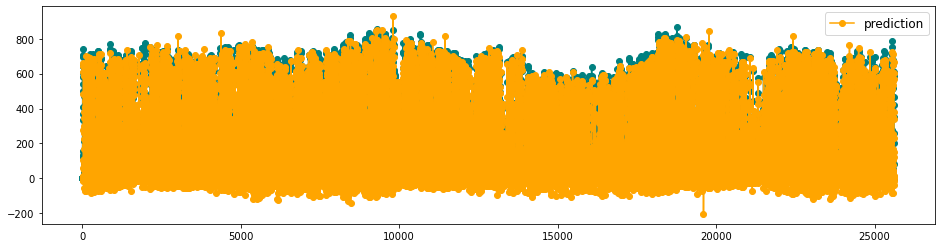

In [77]:
lr = LinearRegression()
lr_fit = lr.fit(X, y)
lr_prediction = lr_fit.predict(X)

plt.figure(figsize=(16, 4))
plt.plot(target_diff.values, '-o', color='teal')
plt.plot(np.arange(lag, len(time_series)), lr_prediction, '-o', label='prediction', color='orange')
plt.legend(fontsize=12);

print('MAE = {0:.3f}'.format(mean_absolute_error(time_series[lag:], lr_prediction)))
print('MAE2 = {0:.3f}'.format(mean_absolute_error(time_series[-90:], lr_prediction[-90:]))) #for the last 90 days only

In [79]:
y[:30]

array([  0,   0,   0,   0,   0,   0,   0,   0,   5, 133, 335, 501, 602,
       646, 642, 474, 491, 363, 118,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int64)

In [80]:
ar = tsa.AR(time_series)
optlag = ar.select_order(91, ic='aic') 
print("Best optimal lag for ar model: {}".format(optlag))

D:\Anaconda\envs\data_engeneering\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWar

Best optimal lag for ar model: 91
